In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_racket = pd.read_csv(r"C:\Users\Nont\Desktop\Data analytics\Projects\Badminton Analysis\badminton_racket_dataset_cleaned2.csv")
df_size = pd.read_csv(r"C:\Users\Nont\Desktop\Data analytics\Projects\Badminton Analysis\badminton_racket_size_dataset_cleaned.csv")
df_player = pd.read_csv(r"C:\Users\Nont\Desktop\Data analytics\Projects\Badminton Analysis\badminton_player_racket_dataset_cleaned.csv")

print(plt.style.available)
plt.style.use(plt.style.available[8])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [250]:
df_racket.groupby('skill_level').agg(
    {'balance_rating': ['count', 'mean', 'min', 'max', 'median'],
    'stiffness_rating': ['count', 'mean', 'min', 'max', 'median'],
    'price_baht': ['count', 'mean', 'min', 'max', 'median']
    })

balance_rating                      stiffness_rating           \
                      count  mean min max median            count mean min   
skill_level                                                                  
Advanced                  8  3.75   1   5    4.5                8  4.5   4   
Beginner                 20  2.55   1   4    3.0               20  2.5   1   
Intermediate             25  3.32   1   5    3.0               25  3.6   2   

                        price_baht                                           
             max median      count         mean      min      max    median  
skill_level                                                                  
Advanced       5    4.5          3  4479.446667  4275.78  4642.38  4520.180  
Beginner       4    3.0         14  2339.817143   977.11  4863.56  1990.885  
Intermediate   5    4.0         17  4189.132353  2442.78  5081.08  4507.960

In [255]:
df_skill_spec = df_racket.groupby('skill_level')[['balance_rating', 'stiffness_rating']].mean(numeric_only=True).sort_values("balance_rating",ascending=True)

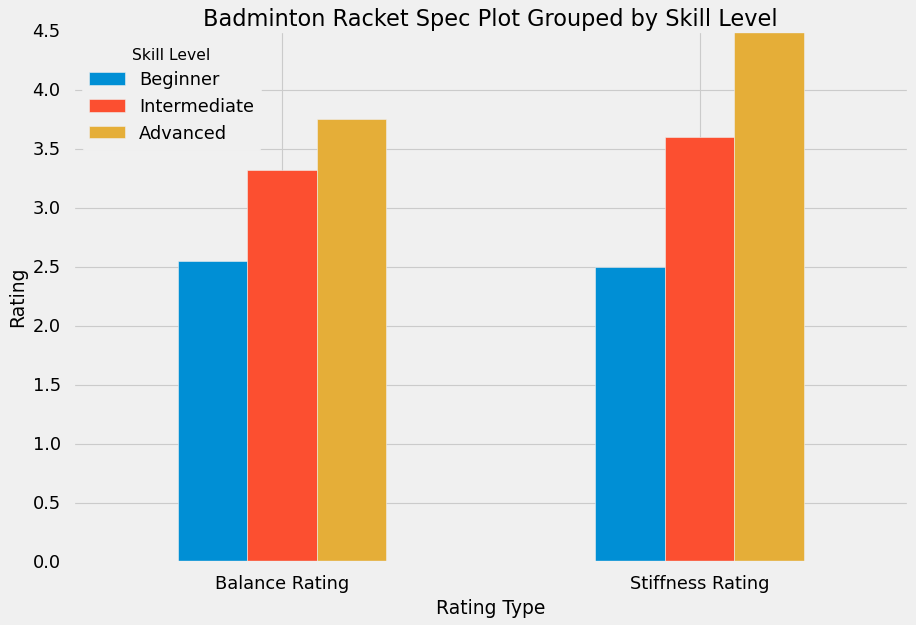

In [272]:
df_skill_spec_plot = df_skill_spec.T.plot(kind='bar', figsize=(12, 8))

# Title and labels
df_skill_spec_plot.set_title('Badminton Racket Spec Plot Grouped by Skill Level')
df_skill_spec_plot.set_xlabel('Rating Type')
df_skill_spec_plot.set_ylabel('Rating')

# Rotating labels on x-axis 
df_skill_spec_plot.set_xticklabels(['Balance Rating','Stiffness Rating'], rotation=0)

# legend
df_skill_spec_plot.legend(title='Skill Level', loc='upper left')

In [273]:
desired_order = ['Beginner', 'Intermediate', 'Advanced']
df_racket['skill_level'] = pd.Categorical(df_racket['skill_level'], categories=desired_order, ordered=True)
df_racket = df_racket.sort_values('skill_level')

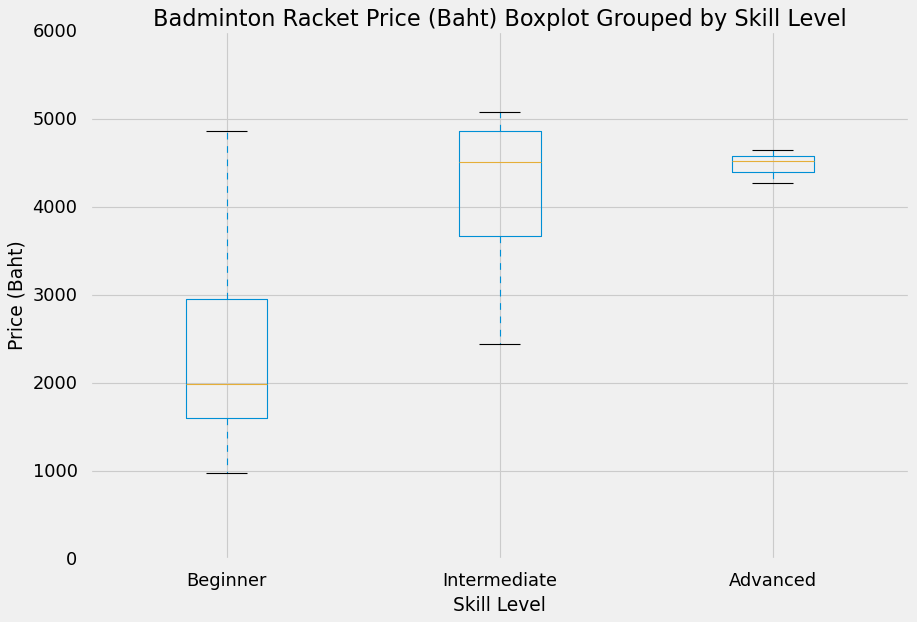

In [274]:
df_racket.boxplot(column='price_baht', by='skill_level')
plt.title('Badminton Racket Price (Baht) Boxplot Grouped by Skill Level')
plt.suptitle('')
plt.xlabel('Skill Level')
plt.ylabel('Price (Baht)')

plt.show()

In [280]:
df_racket.groupby('play_style').agg(
    {'balance_rating': ['count', 'mean', 'min', 'max', 'median'],
    'stiffness_rating': ['count', 'mean', 'min', 'max', 'median'],
    'price_baht': ['count', 'mean', 'min', 'max', 'median']
    })

balance_rating                          stiffness_rating            \
                    count      mean min max median            count      mean   
play_style                                                                      
All-round              31  2.741935   1   5    3.0               31  3.064516   
Defense                 2  1.000000   1   1    1.0                2  3.000000   
Offense                18  3.722222   1   5    4.5               18  3.833333   
Training                2  5.000000   5   5    5.0                2  3.000000   

                          price_baht                                          
           min max median      count         mean      min      max   median  
play_style                                                                    
All-round    1   5    3.0         23  3064.766957   977.11  5081.08  2909.34  
Defense      2   4    3.0          2  3475.370000  2442.78  4507.96  3475.37  
Offense      1   5    4.0          9  4441.183333  2934.27  5054.19  4764.58  
Training     3   3    3.0          0          NaN      NaN      NaN      NaN

In [281]:
df_play_spec = df_racket.groupby('play_style')[['balance_rating', 'stiffness_rating']].mean(numeric_only=True).sort_values("balance_rating",ascending=True)

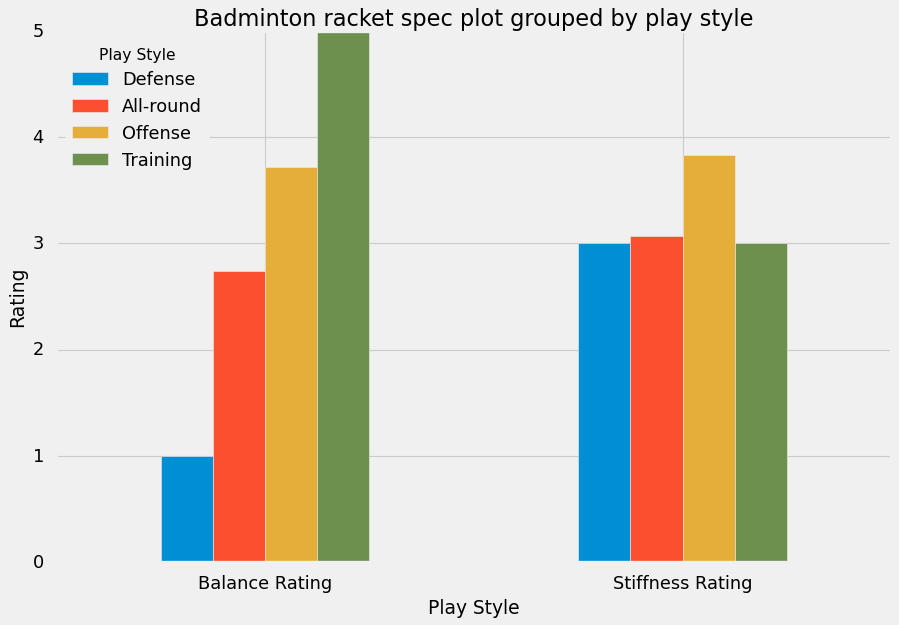

In [283]:
df_play_spec_plot = df_play_spec.T.plot(kind='bar', figsize=(12, 8))

# Title and labels
df_play_spec_plot.set_title('Badminton racket spec plot grouped by play style')
df_play_spec_plot.set_xlabel('Play Style')
df_play_spec_plot.set_ylabel('Rating')

# Rotating labels on x-axis
df_play_spec_plot.set_xticklabels(['Balance Rating','Stiffness Rating'], rotation=0)

# legend
df_play_spec_plot.legend(title='Play Style', loc='upper left')

In [284]:
desired_order = ['Beginner', 'Intermediate', 'Advanced']
df_racket['skill_level'] = pd.Categorical(df_racket['skill_level'], categories=desired_order, ordered=True)
df_racket = df_racket.sort_values('skill_level')

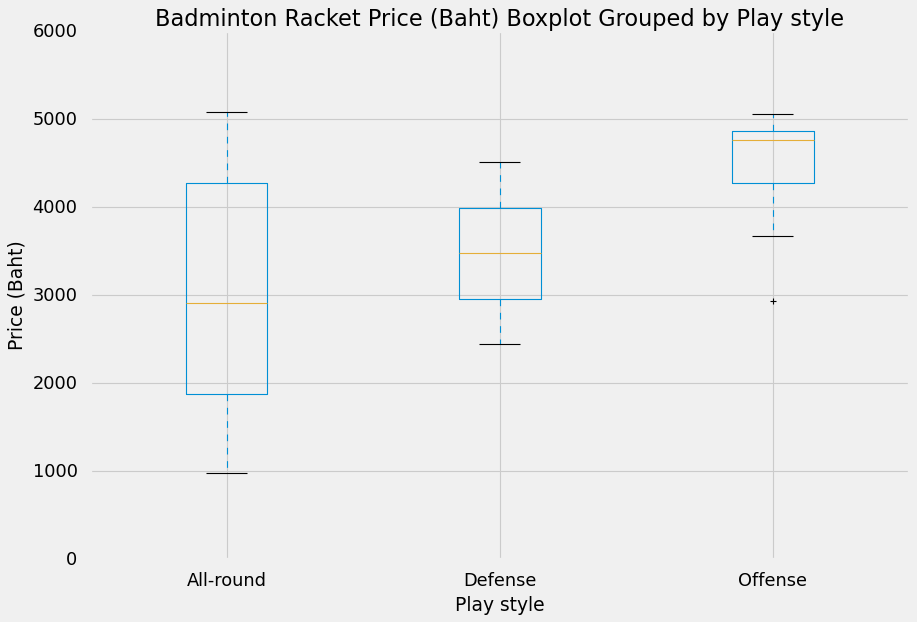

In [285]:
# Drop Training group as there's no price provided hence no box
filtered_df = df_racket[df_racket['play_style'] != 'Training']

filtered_df.boxplot(column='price_baht', by='play_style')
plt.title('Badminton Racket Price (Baht) Boxplot Grouped by Play style')
plt.suptitle('')
plt.xlabel('Play style')
plt.ylabel('Price (Baht)')

plt.show()

In [401]:
df_material_price = df_racket.groupby('material')[['price_baht']].mean(numeric_only=True).sort_values("price_baht",ascending=True)

In [403]:
df_material_price = df_material_price.dropna()

In [185]:
material_sum_price = dict()
for materials, row_data in df_material_price.iterrows():    
    price = row_data['price_baht']
    for mat in materials.split(', '):
        if mat not in material_sum_price:
            material_sum_price[mat] = [price, 1]
        else:
            material_sum_price[mat][0] += price
            material_sum_price[mat][1] += 1
material_price_df = pd.DataFrame(columns = ['Material', 'avg_price_contained'])
for key, value in material_sum_price.items():
    material_price_df.loc[len(material_price_df)] = [key, round(value[0]/value[1],2)]
material_price_df = material_price_df.sort_values('avg_price_contained', ascending=False)

<Axes: title={'center': 'Avg price of badminton rackets containing the material'}, xlabel='Price (Baht)', ylabel='Materials'>

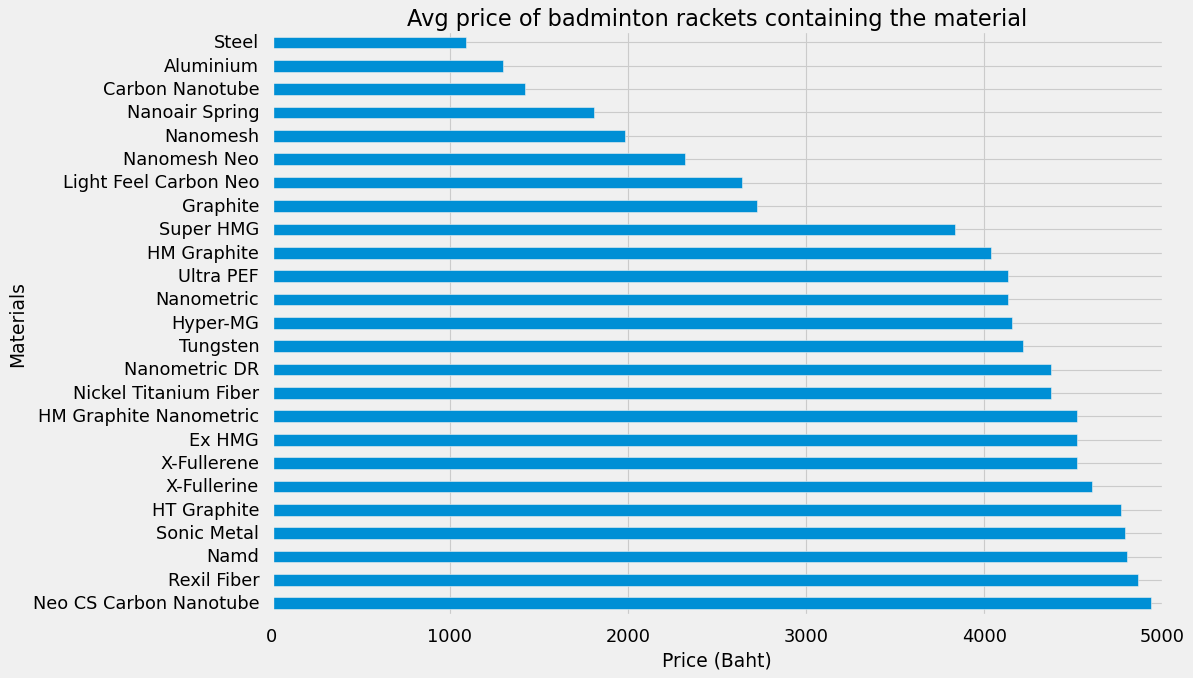

In [188]:
material_price_df.plot(kind='barh', title='Avg price of badminton rackets containing the material', 
                       x='Material', ylabel='Materials', xlabel='Price (Baht)', legend=False)

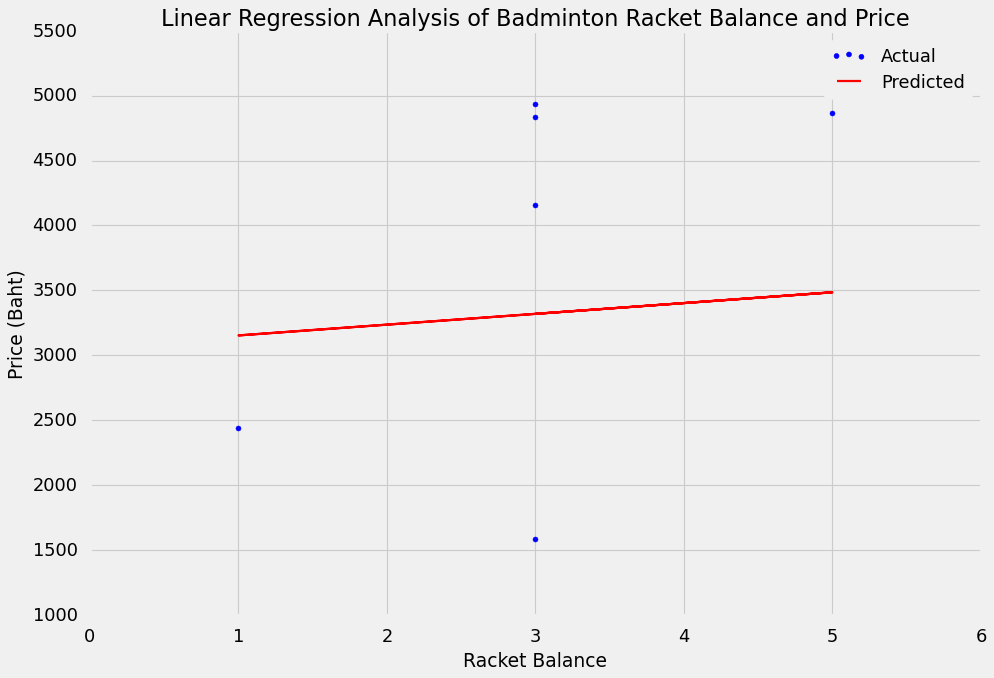

In [288]:
# Note: to make regression doable, I temporarily removes row with null price, so they will only contain 34 from 53 rackets
df_racket_temp = df_racket.dropna(subset="price_baht")

X_train, X_test, y_train, y_test = train_test_split(df_racket_temp[['balance_rating']], df_racket_temp['price_baht'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Racket Balance')
plt.ylabel('Price (Baht)')
plt.legend()
plt.title('Linear Regression Analysis of Badminton Racket Balance and Price')
plt.show()


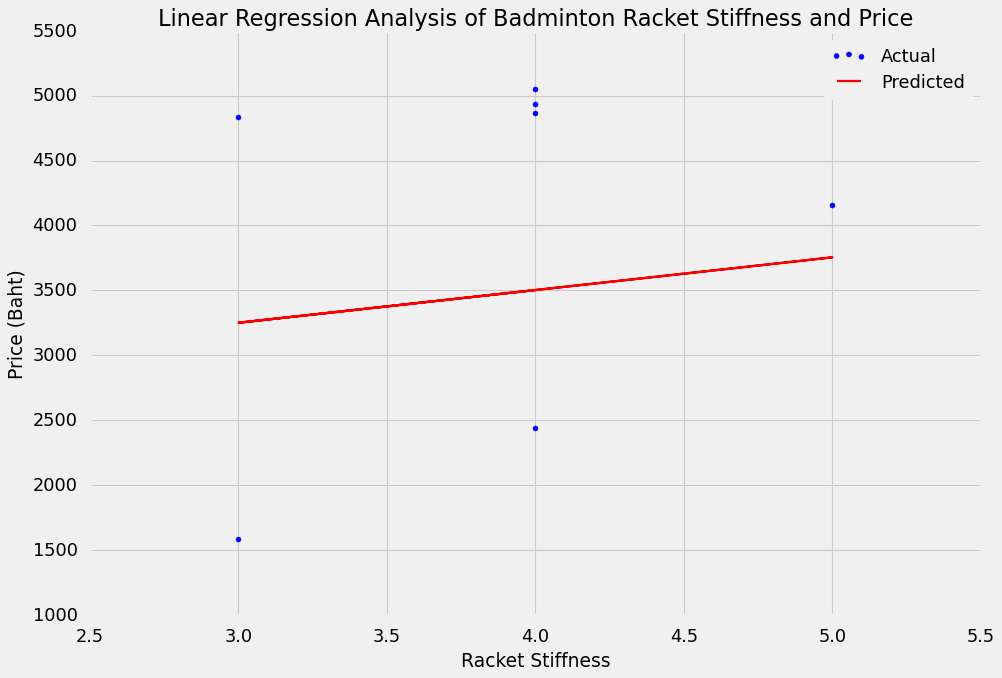

In [289]:
X_train, X_test, y_train, y_test = train_test_split(df_racket_temp[['stiffness_rating']], df_racket_temp['price_baht'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Racket Stiffness')
plt.ylabel('Price (Baht)')
plt.legend()
plt.title('Linear Regression Analysis of Badminton Racket Stiffness and Price')
plt.show()

In [290]:
df_player_racket = df_player.merge(df_racket, left_on='racket_used', right_on='racket_id')

In [291]:
df_player_racket.groupby(['gender']).agg(
    {'balance_rating': ['count', 'mean', 'min', 'max'],
    'stiffness_rating': ['count', 'mean', 'min', 'max']
    })

balance_rating                   stiffness_rating                  
                count      mean min max            count      mean min max
gender                                                                    
Female             14  2.142857   1   5               14  3.642857   3   5
Male               17  3.705882   1   5               17  4.352941   3   5

In [397]:
df_mean_ratings = df_player_racket.groupby(['play_type', 'gender'])[['balance_rating', 'stiffness_rating']].mean(numeric_only=True).reset_index()

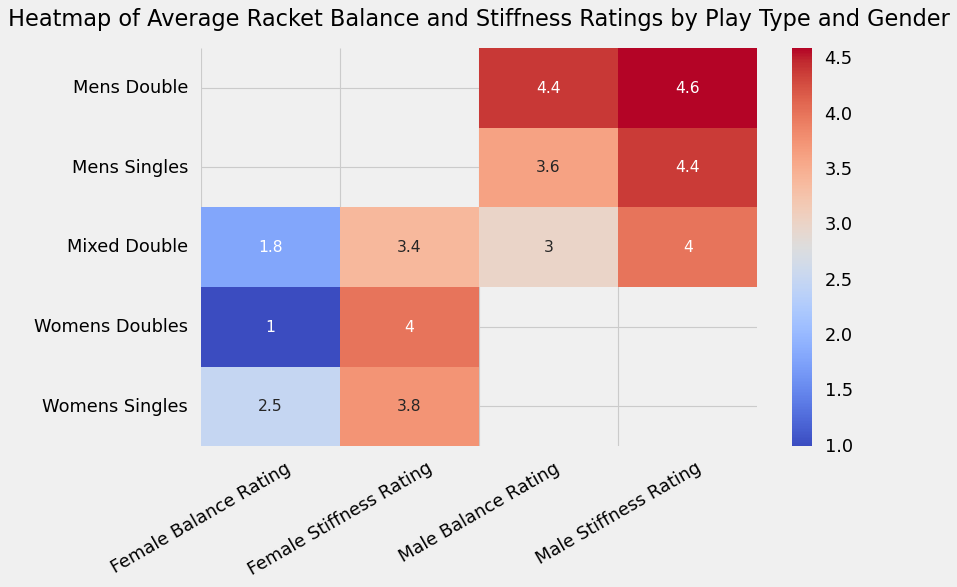

In [398]:
rating_pivot = df_mean_ratings.pivot(index='play_type', columns='gender', values=['balance_rating', 'stiffness_rating'])
rating_pivot.columns = rating_pivot.columns.swaplevel(0, 1)
rating_pivot = rating_pivot.sort_index(axis=1)
new_labels = [col[0] + ' ' + ' '.join(col[1].split('_')).title() for col in rating_pivot.columns.values]

plt.figure(figsize=(10, 6))

sns.heatmap(rating_pivot, annot=True, cmap='coolwarm')
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=30)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Heatmap of Average Racket Balance and Stiffness Ratings by Play Type and Gender', pad=20)
plt.show()

In [400]:
df_mean_ratings.to_csv(r"C:\Users\Nont\Desktop\Data analytics\Projects\Badminton Analysis\player_racket_spec_mean.csv")